# Face Generation

In this project, you'll define and train a DCGAN on a dataset of faces. Your goal is to get a generator network to generate *new* images of faces that look as realistic as possible!

The project will be broken down into a series of tasks from **loading in data to defining and training adversarial networks**. At the end of the notebook, you'll be able to visualize the results of your trained Generator to see how it performs; your generated samples should look like fairly realistic faces with small amounts of noise.

### Get the Data

You'll be using the [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) to train your adversarial networks.

This dataset is more complex than the number datasets (like MNIST or SVHN) you've been working with, and so, you should prepare to define deeper networks and train them for a longer time to get good results. It is suggested that you utilize a GPU for training.

### Pre-processed Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. Some sample data is show below.

<img src='assets/processed_face_data.png' width=60% />

> If you are working locally, you can download this data [by clicking here](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip)

This is a zip file that you'll need to extract in the home directory of this notebook for further loading and processing. After extracting the data, you should be left with a directory of data `processed_celeba_small/`

In [1]:
# can comment out after executing
#!unzip processed_celeba_small.zip

In [2]:
data_dir = 'processed_celeba_small/'

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import problem_unittests as tests
#import helper

%matplotlib inline

## Visualize the CelebA Data

The [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations. Since you're going to be generating faces, you won't need the annotations, you'll only need the images. Note that these are color images with [3 color channels (RGB)](https://en.wikipedia.org/wiki/Channel_(digital_image)#RGB_Images) each.

### Pre-process and Load the Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. This *pre-processed* dataset is a smaller subset of the very large CelebA data.

> There are a few other steps that you'll need to **transform** this data and create a **DataLoader**.

#### Exercise: Complete the following `get_dataloader` function, such that it satisfies these requirements:

* Your images should be square, Tensor images of size `image_size x image_size` in the x and y dimension.
* Your function should return a DataLoader that shuffles and batches these Tensor images.

#### ImageFolder

To create a dataset given a directory of images, it's recommended that you use PyTorch's [ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) wrapper, with a root directory `processed_celeba_small/` and data transformation passed in.

In [3]:
# necessary imports
import torch
from torchvision import datasets
from torchvision import transforms

In [4]:
def get_dataloader(batch_size, image_size, data_dir='processed_celeba_small/'):
    """
    Batch the neural network data using DataLoader
    :param batch_size: The size of each batch; the number of images in a batch
    :param img_size: The square size of the image data (x, y)
    :param data_dir: Directory where image data is located
    :return: DataLoader with batched data
    """
    
    # TODO: Implement function and return a dataloader
    
    transform = transforms.Compose([transforms.Resize((image_size, image_size)), 
                                         transforms.ToTensor()])
    
    train_data = datasets.ImageFolder(data_dir, transform=transform)
    
    num_workers = 0
    train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                              batch_size=batch_size,
                                              shuffle=True,
                                              num_workers=num_workers)
    return train_loader


## Create a DataLoader

#### Exercise: Create a DataLoader `celeba_train_loader` with appropriate hyperparameters.

Call the above function and create a dataloader to view images. 
* You can decide on any reasonable `batch_size` parameter
* Your `image_size` **must be** `32`. Resizing the data to a smaller size will make for faster training, while still creating convincing images of faces!

In [5]:
# Define function hyperparameters
batch_size = 64
img_size = 32

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# Call your function and get a dataloader
celeba_train_loader = get_dataloader(batch_size, img_size)


Next, you can view some images! You should seen square images of somewhat-centered faces.

Note: You'll need to convert the Tensor images into a NumPy type and transpose the dimensions to correctly display an image, suggested `imshow` code is below, but it may not be perfect.

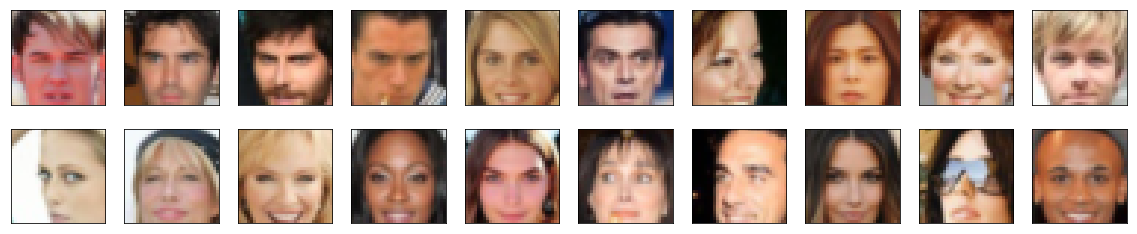

In [6]:
# helper display function
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# obtain one batch of training images
dataiter = iter(celeba_train_loader)
images, _ = dataiter.next() # _ for no labels

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

#### Exercise: Pre-process your image data and scale it to a pixel range of -1 to 1

You need to do a bit of pre-processing; you know that the output of a `tanh` activated generator will contain pixel values in a range from -1 to 1, and so, we need to rescale our training images to a range of -1 to 1. (Right now, they are in a range from 0-1.)

In [7]:
# TODO: Complete the scale function
def scale(x, feature_range=(-1, 1)):
    ''' Scale takes in an image x and returns that image, scaled
       with a feature_range of pixel values from -1 to 1. 
       This function assumes that the input x is already scaled from 0-1.'''
    # assume x is scaled to (0, 1)
    # scale to feature_range and return scaled x
    
    #print('Before: Min: ', x.min(), ', Max: ', x.max())
    
    min, max = feature_range
    x = x * (max - min) + min
    
    #print('After: Min: ', x.min(), ', Max: ', x.max())
    
    return x


In [8]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# check scaled range
# should be close to -1 to 1
img = images[0]
scaled_img = scale(img)

print('Min: ', scaled_img.min())
print('Max: ', scaled_img.max())

Min:  tensor(-0.8902)
Max:  tensor(0.8745)


---
# Define the Model

A GAN is comprised of two adversarial networks, a discriminator and a generator.

## Discriminator

Your first task will be to define the discriminator. This is a convolutional classifier like you've built before, only without any maxpooling layers. To deal with this complex data, it's suggested you use a deep network with **normalization**. You are also allowed to create any helper functions that may be useful.

#### Exercise: Complete the Discriminator class
* The inputs to the discriminator are 32x32x3 tensor images
* The output should be a single value that will indicate whether a given image is real or fake


In [9]:
import torch.nn as nn
import torch.nn.functional as F

In [10]:
# helper function creating convolutional layers with optional batch normalization

def conv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True):
    layers = []
    
    conv_layer = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
    layers.append(conv_layer)

    if batch_norm:
        layers.append(nn.BatchNorm2d(out_channels))

    return nn.Sequential(*layers)

In [11]:
class Discriminator(nn.Module):

    def __init__(self, conv_dim):
        """
        Initialize the Discriminator Module
        :param conv_dim: The depth of the first convolutional layer
        """
        super(Discriminator, self).__init__()

        self.conv_dim = conv_dim
        
        # Layers (conv_dim = 32):
        # self.conv1 = 32*32 input → 16*16 out, depth 3 → 32
        # self.conv2 = 16*16 → 8*8, depth 32 → 64
        # self.conv3 = 8*8 → 4*4, depth 64 → 128
        # self.fc
        
        self.conv1 = conv(3, conv_dim, kernel_size=4, stride=2, padding=1, batch_norm=False) # No batch norm on first 
        self.conv2 = conv(conv_dim, conv_dim*2, kernel_size=4, stride=2, padding=1, batch_norm=True)
        self.conv3 = conv(conv_dim*2, conv_dim*4, kernel_size=4, stride=2, padding=1, batch_norm=True)        
        self.fc = nn.Linear(conv_dim*4 * (4*4), 1)
        

    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: Discriminator logits; the output of the neural network
        """
        # define feedforward behavior
        
        x = F.leaky_relu(self.conv1(x), 0.2)
        x = F.leaky_relu(self.conv2(x), 0.2)
        x = F.leaky_relu(self.conv3(x), 0.2)
        
        # flatten
        x = x.view(-1, self.conv_dim*4*4*4)
        
        out = self.fc(x)        
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(Discriminator)

Tests Passed


## Generator

The generator should upsample an input and generate a *new* image of the same size as our training data `32x32x3`. This should be mostly transpose convolutional layers with normalization applied to the outputs.

#### Exercise: Complete the Generator class
* The inputs to the generator are vectors of some length `z_size`
* The output should be a image of shape `32x32x3`

In [12]:
# helper function creating transposed convolutional layers with optional batch normalization

def deconv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True):
    layers = []
    
    conv_layer = nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
    layers.append(conv_layer)

    if batch_norm:
        layers.append(nn.BatchNorm2d(out_channels))

    return nn.Sequential(*layers)

In [13]:
class Generator(nn.Module):
    
    def __init__(self, z_size, conv_dim):
        """
        Initialize the Generator Module
        :param z_size: The length of the input latent vector, z
        :param conv_dim: The depth of the inputs to the *last* transpose convolutional layer
        """
        super(Generator, self).__init__()
        
        self.conv_dim = conv_dim
        
        # Layers (conv_dim = 32):
        # self.fc
        # self.conv1 = 4x4 → 8x8, depth 128 → 64
        # self.conv2 = 8x8 → 16x16, depth 64 → 32
        # self.conv3 = 16x16 → 32x32, depth 32 → 3
        
        self.fc = nn.Linear(z_size, conv_dim*4 * (4*4))
        self.conv1 = deconv(conv_dim*4, conv_dim*2, kernel_size=4, stride=2, padding=1, batch_norm=True)        
        self.conv2 = deconv(conv_dim*2, conv_dim, kernel_size=4, stride=2, padding=1, batch_norm=True)
        self.conv3 = deconv(conv_dim, 3, kernel_size=4, stride=2, padding=1, batch_norm=False)
        

    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: A 32x32x3 Tensor image as output
        """
        
        x = self.fc(x)
        x = x.view(-1, self.conv_dim*4, 4, 4)  # batch size, depth, witdth, height        
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.conv3(x)
        out = F.tanh(x)
        
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(Generator)

Tests Passed


## Initialize the weights of your networks

To help your models converge, you should initialize the weights of the convolutional and linear layers in your model. From reading the [original DCGAN paper](https://arxiv.org/pdf/1511.06434.pdf), they say:
> All weights were initialized from a zero-centered Normal distribution with standard deviation 0.02.

So, your next task will be to define a weight initialization function that does just this!

You can refer back to the lesson on weight initialization or even consult existing model code, such as that from [the `networks.py` file in CycleGAN Github repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/models/networks.py) to help you complete this function.

#### Exercise: Complete the weight initialization function

* This should initialize only **convolutional** and **linear** layers
* Initialize the weights to a normal distribution, centered around 0, with a standard deviation of 0.02.
* The bias terms, if they exist, may be left alone or set to 0.

In [14]:
def weights_init_normal(m):
    """
    Applies initial weights to certain layers in a model .
    The weights are taken from a normal distribution 
    with mean = 0, std dev = 0.02.
    :param m: A module or layer in a network    
    """
    # classname will be something like:
    # `Conv`, `BatchNorm2d`, `Linear`, etc.
    classname = m.__class__.__name__
    
    # TODO: Apply initial weights to convolutional and linear layers
    
    if ('Conv' in classname or 'Linear' in classname) and hasattr(m,'weight'):
        m.weight.data.normal_(0.0, 0.02)
        
        if hasattr(m, 'bias') and m.bias is not None:
            m.bias.data.zero_()
    
    

## Build complete network

Define your models' hyperparameters and instantiate the discriminator and generator from the classes defined above. Make sure you've passed in the correct input arguments.

In [15]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
def build_network(d_conv_dim, g_conv_dim, z_size):
    # define discriminator and generator
    D = Discriminator(d_conv_dim)
    G = Generator(z_size=z_size, conv_dim=g_conv_dim)

    # initialize model weights
    D.apply(weights_init_normal)
    G.apply(weights_init_normal)

    print(D)
    print()
    print(G)
    
    return D, G


#### Exercise: Define model hyperparameters

In [16]:
# Define model hyperparams
d_conv_dim = 32
g_conv_dim = 32
z_size = 100

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
D, G = build_network(d_conv_dim, g_conv_dim, z_size)

Discriminator(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc): Linear(in_features=2048, out_features=1, bias=True)
)

Generator(
  (fc): Linear(in_features=100, out_features=2048, bias=True)
  (conv1): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=Fal

### Training on GPU

Check if you can train on GPU. Here, we'll set this as a boolean variable `train_on_gpu`. Later, you'll be responsible for making sure that 
>* Models,
* Model inputs, and
* Loss function arguments

Are moved to GPU, where appropriate.

In [17]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import torch

# Check for a GPU
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Training on GPU!')

Training on GPU!


---
## Discriminator and Generator Losses

Now we need to calculate the losses for both types of adversarial networks.

### Discriminator Losses

> * For the discriminator, the total loss is the sum of the losses for real and fake images, `d_loss = d_real_loss + d_fake_loss`. 
* Remember that we want the discriminator to output 1 for real images and 0 for fake images, so we need to set up the losses to reflect that.


### Generator Loss

The generator loss will look similar only with flipped labels. The generator's goal is to get the discriminator to *think* its generated images are *real*.

#### Exercise: Complete real and fake loss functions

**You may choose to use either cross entropy or a least squares error loss to complete the following `real_loss` and `fake_loss` functions.**

In [18]:
def real_loss(D_out):
    '''Calculates how close discriminator outputs are to being real.
       param, D_out: discriminator logits
       return: real loss'''
    
    batch_size = D_out.size(0)
    labels = torch.ones(batch_size) # sets all labels to 1 = real image
    
    if train_on_gpu:
        labels = labels.cuda()

    criterion = nn.BCEWithLogitsLoss() # binary cross entropy with logits loss
    loss = criterion(D_out.squeeze(), labels) # squeeze removes single-dimensional entries from the shape of the array
    return loss

def fake_loss(D_out):
    '''Calculates how close discriminator outputs are to being fake.
       param, D_out: discriminator logits
       return: fake loss'''
    
    batch_size = D_out.size(0)
    labels = torch.zeros(batch_size) # sets all labels to 0 = fake image
    
    if train_on_gpu:
        labels = labels.cuda()

    criterion = nn.BCEWithLogitsLoss() # binary cross entropy with logits loss
    loss = criterion(D_out.squeeze(), labels) # squeeze removes single-dimensional entries from the shape of the array
    return loss

## Optimizers

#### Exercise: Define optimizers for your Discriminator (D) and Generator (G)

Define optimizers for your models with appropriate hyperparameters.

In [19]:
import torch.optim as optim
# params
lr = 0.0002
beta1 = 0.5
beta2 = 0.999 # default value

# Create optimizers for the discriminator D and generator G
d_optimizer = optim.Adam(D.parameters(), lr, [beta1, beta2])
g_optimizer = optim.Adam(G.parameters(), lr, [beta1, beta2])

---
## Training

Training will involve alternating between training the discriminator and the generator. You'll use your functions `real_loss` and `fake_loss` to help you calculate the discriminator losses.

* You should train the discriminator by alternating on real and fake images
* Then the generator, which tries to trick the discriminator and should have an opposing loss function


#### Saving Samples

You've been given some code to print out some loss statistics and save some generated "fake" samples.

#### Exercise: Complete the training function

Keep in mind that, if you've moved your models to GPU, you'll also have to move any model inputs to GPU.

In [20]:
def train(D, G, n_epochs, print_every=50):
    '''Trains adversarial networks for some number of epochs
       param, D: the discriminator network
       param, G: the generator network
       param, n_epochs: number of epochs to train for
       param, print_every: when to print and record the models' losses
       return: D and G losses'''
    
    # move models to GPU
    if train_on_gpu:
        D.cuda()
        G.cuda()

    # keep track of loss and generated, "fake" samples
    samples = []
    losses = []

    # Get some fixed data for sampling. These are images that are held
    # constant throughout training, and allow us to inspect the model's performance
    sample_size=16
    fixed_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
    fixed_z = torch.from_numpy(fixed_z).float()
    # move z to GPU if available
    if train_on_gpu:
        fixed_z = fixed_z.cuda()

    # epoch training loop
    for epoch in range(n_epochs):

        # batch training loop
        for batch_i, (real_images, _) in enumerate(celeba_train_loader):

            batch_size = real_images.size(0)            

            # ===============================================
            #         YOUR CODE HERE: TRAIN THE NETWORKS
            # ===============================================
            
            
            # 1. Train the DISCRIMINATOR on real and fake images
            # ---------------------------------------------------
            d_optimizer.zero_grad()
            
            # real images
            real_images = scale(real_images)
            if train_on_gpu:
                real_images = real_images.cuda()            
            D_real = D(real_images)
            D_real_loss = real_loss(D_real) # discriminator losses on real images 
            
            # generate fake images for discriminator
            z = np.random.uniform(-1, 1, size=(batch_size, z_size))
            z = torch.from_numpy(z).float()
            if train_on_gpu:
                z = z.cuda()
            fake_images = G(z)
            
            # fake images
            D_fake = D(fake_images)
            D_fake_loss = fake_loss(D_fake) # discriminator losses on fake images 
            
            # adding losses + backprop
            d_loss = D_real_loss + D_fake_loss
            d_loss.backward()
            d_optimizer.step()

            
            # 2. Train the GENERATOR with an adversarial loss
            # ---------------------------------------------------
            g_optimizer.zero_grad()
            
            # generate fake images for generator
            z = np.random.uniform(-1, 1, size=(batch_size, z_size))
            z = torch.from_numpy(z).float()
            if train_on_gpu:
                z = z.cuda()
            fake_images = G(z)
            
            # discriminator results
            D_fake = D(fake_images)
            
            # discriminator losses on fake images + backprop
            g_loss = real_loss(D_fake) # using real loss to flip labels (fake image should be real)
            g_loss.backward()
            g_optimizer.step()
            
            
            # ===============================================
            #              END OF YOUR CODE
            # ===============================================

            # Print some loss stats
            if batch_i % print_every == 0:
                # append discriminator loss and generator loss
                losses.append((d_loss.item(), g_loss.item()))
                # print discriminator and generator loss
                print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                        epoch+1, n_epochs, d_loss.item(), g_loss.item()))


        ## AFTER EACH EPOCH##    
        # this code assumes your generator is named G, feel free to change the name
        # generate and save sample, fake images
        G.eval() # for generating samples
        samples_z = G(fixed_z)
        samples.append(samples_z)
        G.train() # back to training mode

    # Save training generator samples
    with open('train_samples.pkl', 'wb') as f:
        pkl.dump(samples, f)
    
    # finally return losses
    return losses

Set your number of training epochs and train your GAN!

In [21]:
# set number of epochs 
n_epochs = 100


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# call training function
losses = train(D, G, n_epochs=n_epochs)

Epoch [    1/  100] | d_loss: 1.3979 | g_loss: 0.8104
Epoch [    1/  100] | d_loss: 0.1839 | g_loss: 2.9545
Epoch [    1/  100] | d_loss: 0.0921 | g_loss: 3.9074
Epoch [    1/  100] | d_loss: 0.1315 | g_loss: 3.2512
Epoch [    1/  100] | d_loss: 0.1426 | g_loss: 2.8089
Epoch [    1/  100] | d_loss: 0.4207 | g_loss: 2.2251
Epoch [    1/  100] | d_loss: 0.4715 | g_loss: 1.1796
Epoch [    1/  100] | d_loss: 0.9609 | g_loss: 2.5584
Epoch [    1/  100] | d_loss: 0.5892 | g_loss: 1.6969
Epoch [    1/  100] | d_loss: 0.6224 | g_loss: 1.8231
Epoch [    1/  100] | d_loss: 0.7713 | g_loss: 1.3911
Epoch [    1/  100] | d_loss: 1.0330 | g_loss: 2.2788
Epoch [    1/  100] | d_loss: 0.8390 | g_loss: 1.5001
Epoch [    1/  100] | d_loss: 0.9272 | g_loss: 1.0393
Epoch [    1/  100] | d_loss: 0.9307 | g_loss: 1.1807
Epoch [    1/  100] | d_loss: 1.1010 | g_loss: 1.1601
Epoch [    1/  100] | d_loss: 1.0078 | g_loss: 1.6961
Epoch [    1/  100] | d_loss: 1.1446 | g_loss: 1.2250
Epoch [    1/  100] | d_loss

Epoch [    6/  100] | d_loss: 1.0214 | g_loss: 1.3656
Epoch [    6/  100] | d_loss: 1.0476 | g_loss: 1.4873
Epoch [    6/  100] | d_loss: 1.0257 | g_loss: 0.8117
Epoch [    6/  100] | d_loss: 0.7143 | g_loss: 1.8056
Epoch [    6/  100] | d_loss: 0.9651 | g_loss: 1.1887
Epoch [    6/  100] | d_loss: 1.0894 | g_loss: 1.2135
Epoch [    6/  100] | d_loss: 0.8730 | g_loss: 1.3693
Epoch [    6/  100] | d_loss: 0.8830 | g_loss: 1.8523
Epoch [    6/  100] | d_loss: 1.2971 | g_loss: 2.3532
Epoch [    6/  100] | d_loss: 0.7073 | g_loss: 1.3441
Epoch [    6/  100] | d_loss: 0.8835 | g_loss: 1.4133
Epoch [    6/  100] | d_loss: 1.0002 | g_loss: 1.5268
Epoch [    6/  100] | d_loss: 0.8397 | g_loss: 1.8857
Epoch [    6/  100] | d_loss: 0.7663 | g_loss: 1.3853
Epoch [    6/  100] | d_loss: 0.8304 | g_loss: 1.0631
Epoch [    6/  100] | d_loss: 0.9672 | g_loss: 1.5043
Epoch [    6/  100] | d_loss: 1.0327 | g_loss: 1.5734
Epoch [    6/  100] | d_loss: 0.8668 | g_loss: 0.9850
Epoch [    6/  100] | d_loss

Epoch [   11/  100] | d_loss: 0.7398 | g_loss: 0.6259
Epoch [   11/  100] | d_loss: 0.8686 | g_loss: 0.9469
Epoch [   11/  100] | d_loss: 0.5527 | g_loss: 1.3320
Epoch [   11/  100] | d_loss: 0.8757 | g_loss: 0.6875
Epoch [   11/  100] | d_loss: 0.6400 | g_loss: 1.6539
Epoch [   11/  100] | d_loss: 0.4653 | g_loss: 1.5174
Epoch [   11/  100] | d_loss: 0.8045 | g_loss: 0.8666
Epoch [   11/  100] | d_loss: 0.7975 | g_loss: 1.3742
Epoch [   11/  100] | d_loss: 0.7171 | g_loss: 1.5994
Epoch [   11/  100] | d_loss: 0.7128 | g_loss: 1.5253
Epoch [   11/  100] | d_loss: 0.6349 | g_loss: 1.2766
Epoch [   11/  100] | d_loss: 0.6664 | g_loss: 1.5655
Epoch [   11/  100] | d_loss: 0.5221 | g_loss: 1.7993
Epoch [   11/  100] | d_loss: 0.8116 | g_loss: 1.4757
Epoch [   11/  100] | d_loss: 0.4323 | g_loss: 1.1346
Epoch [   12/  100] | d_loss: 0.8625 | g_loss: 0.7836
Epoch [   12/  100] | d_loss: 0.5359 | g_loss: 2.0607
Epoch [   12/  100] | d_loss: 0.6515 | g_loss: 1.3898
Epoch [   12/  100] | d_loss

Epoch [   16/  100] | d_loss: 0.4850 | g_loss: 2.6630
Epoch [   16/  100] | d_loss: 0.5712 | g_loss: 1.6943
Epoch [   16/  100] | d_loss: 0.4701 | g_loss: 2.8419
Epoch [   16/  100] | d_loss: 0.4459 | g_loss: 1.9299
Epoch [   16/  100] | d_loss: 0.4337 | g_loss: 2.1429
Epoch [   16/  100] | d_loss: 0.4916 | g_loss: 1.6940
Epoch [   16/  100] | d_loss: 0.3958 | g_loss: 1.9976
Epoch [   16/  100] | d_loss: 0.3875 | g_loss: 2.3279
Epoch [   17/  100] | d_loss: 0.4611 | g_loss: 2.6872
Epoch [   17/  100] | d_loss: 0.3642 | g_loss: 2.5649
Epoch [   17/  100] | d_loss: 0.5081 | g_loss: 1.9811
Epoch [   17/  100] | d_loss: 0.8391 | g_loss: 0.2747
Epoch [   17/  100] | d_loss: 0.4777 | g_loss: 2.0357
Epoch [   17/  100] | d_loss: 0.7952 | g_loss: 2.1939
Epoch [   17/  100] | d_loss: 0.9120 | g_loss: 1.4701
Epoch [   17/  100] | d_loss: 0.3500 | g_loss: 2.1793
Epoch [   17/  100] | d_loss: 0.4352 | g_loss: 1.4374
Epoch [   17/  100] | d_loss: 0.3066 | g_loss: 2.8912
Epoch [   17/  100] | d_loss

Epoch [   21/  100] | d_loss: 0.4050 | g_loss: 1.9107
Epoch [   22/  100] | d_loss: 0.1598 | g_loss: 2.8613
Epoch [   22/  100] | d_loss: 0.3392 | g_loss: 2.8506
Epoch [   22/  100] | d_loss: 0.2203 | g_loss: 3.1770
Epoch [   22/  100] | d_loss: 0.4980 | g_loss: 2.6182
Epoch [   22/  100] | d_loss: 0.3653 | g_loss: 1.9833
Epoch [   22/  100] | d_loss: 0.2985 | g_loss: 2.2095
Epoch [   22/  100] | d_loss: 0.6957 | g_loss: 2.7718
Epoch [   22/  100] | d_loss: 0.4999 | g_loss: 0.7423
Epoch [   22/  100] | d_loss: 0.3376 | g_loss: 3.1050
Epoch [   22/  100] | d_loss: 0.4047 | g_loss: 2.3217
Epoch [   22/  100] | d_loss: 0.1896 | g_loss: 3.5365
Epoch [   22/  100] | d_loss: 0.2065 | g_loss: 2.2065
Epoch [   22/  100] | d_loss: 0.2144 | g_loss: 2.8480
Epoch [   22/  100] | d_loss: 0.3560 | g_loss: 2.9303
Epoch [   22/  100] | d_loss: 2.0632 | g_loss: 3.7964
Epoch [   22/  100] | d_loss: 0.2785 | g_loss: 3.0430
Epoch [   22/  100] | d_loss: 0.3824 | g_loss: 2.5673
Epoch [   22/  100] | d_loss

Epoch [   27/  100] | d_loss: 0.1717 | g_loss: 3.3662
Epoch [   27/  100] | d_loss: 0.1658 | g_loss: 3.3677
Epoch [   27/  100] | d_loss: 0.2183 | g_loss: 3.1612
Epoch [   27/  100] | d_loss: 0.2417 | g_loss: 2.3681
Epoch [   27/  100] | d_loss: 0.2129 | g_loss: 2.3548
Epoch [   27/  100] | d_loss: 0.0932 | g_loss: 4.0668
Epoch [   27/  100] | d_loss: 0.3624 | g_loss: 2.5512
Epoch [   27/  100] | d_loss: 0.2936 | g_loss: 2.7803
Epoch [   27/  100] | d_loss: 0.2237 | g_loss: 3.0150
Epoch [   27/  100] | d_loss: 0.1934 | g_loss: 3.5210
Epoch [   27/  100] | d_loss: 0.2777 | g_loss: 2.7231
Epoch [   27/  100] | d_loss: 0.4439 | g_loss: 2.2873
Epoch [   27/  100] | d_loss: 0.6982 | g_loss: 6.1700
Epoch [   27/  100] | d_loss: 0.2143 | g_loss: 3.3674
Epoch [   27/  100] | d_loss: 0.2832 | g_loss: 1.9017
Epoch [   27/  100] | d_loss: 0.1715 | g_loss: 3.6484
Epoch [   27/  100] | d_loss: 0.2525 | g_loss: 4.3240
Epoch [   27/  100] | d_loss: 0.2796 | g_loss: 3.8521
Epoch [   27/  100] | d_loss

Epoch [   32/  100] | d_loss: 0.0780 | g_loss: 3.7966
Epoch [   32/  100] | d_loss: 0.1384 | g_loss: 4.2870
Epoch [   32/  100] | d_loss: 0.1215 | g_loss: 3.5099
Epoch [   32/  100] | d_loss: 0.1350 | g_loss: 4.8307
Epoch [   32/  100] | d_loss: 0.6118 | g_loss: 1.2362
Epoch [   32/  100] | d_loss: 0.2204 | g_loss: 3.8696
Epoch [   32/  100] | d_loss: 0.2241 | g_loss: 2.7191
Epoch [   32/  100] | d_loss: 0.1846 | g_loss: 4.9381
Epoch [   32/  100] | d_loss: 0.2014 | g_loss: 4.6582
Epoch [   32/  100] | d_loss: 0.1208 | g_loss: 4.0685
Epoch [   32/  100] | d_loss: 0.1441 | g_loss: 3.3698
Epoch [   32/  100] | d_loss: 3.3560 | g_loss: 0.8342
Epoch [   32/  100] | d_loss: 0.0823 | g_loss: 3.7609
Epoch [   32/  100] | d_loss: 0.1513 | g_loss: 3.2042
Epoch [   32/  100] | d_loss: 0.1958 | g_loss: 4.5856
Epoch [   32/  100] | d_loss: 0.3076 | g_loss: 4.0597
Epoch [   33/  100] | d_loss: 0.1946 | g_loss: 3.6929
Epoch [   33/  100] | d_loss: 0.1921 | g_loss: 2.9103
Epoch [   33/  100] | d_loss

Epoch [   37/  100] | d_loss: 0.1136 | g_loss: 3.9446
Epoch [   37/  100] | d_loss: 0.2269 | g_loss: 4.4074
Epoch [   37/  100] | d_loss: 0.0665 | g_loss: 4.0263
Epoch [   37/  100] | d_loss: 0.0500 | g_loss: 4.4280
Epoch [   37/  100] | d_loss: 0.2523 | g_loss: 5.4775
Epoch [   37/  100] | d_loss: 0.1613 | g_loss: 3.3731
Epoch [   37/  100] | d_loss: 0.1650 | g_loss: 2.7554
Epoch [   37/  100] | d_loss: 0.2521 | g_loss: 4.2114
Epoch [   37/  100] | d_loss: 0.1369 | g_loss: 4.5813
Epoch [   38/  100] | d_loss: 0.1281 | g_loss: 2.6331
Epoch [   38/  100] | d_loss: 0.0788 | g_loss: 3.0088
Epoch [   38/  100] | d_loss: 0.1099 | g_loss: 3.5561
Epoch [   38/  100] | d_loss: 0.1194 | g_loss: 4.4306
Epoch [   38/  100] | d_loss: 0.1035 | g_loss: 5.6947
Epoch [   38/  100] | d_loss: 1.0535 | g_loss: 5.1635
Epoch [   38/  100] | d_loss: 0.2035 | g_loss: 2.9567
Epoch [   38/  100] | d_loss: 0.1177 | g_loss: 3.9464
Epoch [   38/  100] | d_loss: 0.1279 | g_loss: 3.5325
Epoch [   38/  100] | d_loss

Epoch [   42/  100] | d_loss: 0.2161 | g_loss: 4.0324
Epoch [   42/  100] | d_loss: 0.1064 | g_loss: 3.9322
Epoch [   43/  100] | d_loss: 0.1927 | g_loss: 3.8983
Epoch [   43/  100] | d_loss: 0.1104 | g_loss: 4.3601
Epoch [   43/  100] | d_loss: 0.1413 | g_loss: 4.2714
Epoch [   43/  100] | d_loss: 0.0551 | g_loss: 4.6169
Epoch [   43/  100] | d_loss: 0.1473 | g_loss: 4.1519
Epoch [   43/  100] | d_loss: 1.0862 | g_loss: 1.1734
Epoch [   43/  100] | d_loss: 0.1639 | g_loss: 3.5505
Epoch [   43/  100] | d_loss: 0.0697 | g_loss: 4.1115
Epoch [   43/  100] | d_loss: 0.1005 | g_loss: 4.2966
Epoch [   43/  100] | d_loss: 0.0764 | g_loss: 4.7562
Epoch [   43/  100] | d_loss: 1.5351 | g_loss: 1.0117
Epoch [   43/  100] | d_loss: 0.1901 | g_loss: 3.2211
Epoch [   43/  100] | d_loss: 0.0449 | g_loss: 4.5669
Epoch [   43/  100] | d_loss: 0.1330 | g_loss: 3.5898
Epoch [   43/  100] | d_loss: 0.5865 | g_loss: 2.1505
Epoch [   43/  100] | d_loss: 0.0906 | g_loss: 3.7137
Epoch [   43/  100] | d_loss

Epoch [   48/  100] | d_loss: 1.0168 | g_loss: 0.5630
Epoch [   48/  100] | d_loss: 0.1423 | g_loss: 4.1848
Epoch [   48/  100] | d_loss: 0.1599 | g_loss: 3.9111
Epoch [   48/  100] | d_loss: 0.0970 | g_loss: 3.2185
Epoch [   48/  100] | d_loss: 0.0990 | g_loss: 2.8350
Epoch [   48/  100] | d_loss: 0.3411 | g_loss: 3.7674
Epoch [   48/  100] | d_loss: 0.2186 | g_loss: 5.0539
Epoch [   48/  100] | d_loss: 0.0997 | g_loss: 3.9397
Epoch [   48/  100] | d_loss: 0.3233 | g_loss: 2.1482
Epoch [   48/  100] | d_loss: 0.1214 | g_loss: 4.5635
Epoch [   48/  100] | d_loss: 0.1882 | g_loss: 5.6910
Epoch [   48/  100] | d_loss: 0.0969 | g_loss: 4.3189
Epoch [   48/  100] | d_loss: 0.4744 | g_loss: 1.0048
Epoch [   48/  100] | d_loss: 0.1060 | g_loss: 4.6876
Epoch [   48/  100] | d_loss: 0.0665 | g_loss: 4.0235
Epoch [   48/  100] | d_loss: 0.2652 | g_loss: 2.5462
Epoch [   48/  100] | d_loss: 0.0684 | g_loss: 5.5022
Epoch [   48/  100] | d_loss: 0.0507 | g_loss: 3.9218
Epoch [   48/  100] | d_loss

Epoch [   53/  100] | d_loss: 0.0583 | g_loss: 4.1798
Epoch [   53/  100] | d_loss: 0.0706 | g_loss: 3.5453
Epoch [   53/  100] | d_loss: 0.0557 | g_loss: 4.2134
Epoch [   53/  100] | d_loss: 0.0469 | g_loss: 4.8957
Epoch [   53/  100] | d_loss: 1.5830 | g_loss: 6.2809
Epoch [   53/  100] | d_loss: 0.0983 | g_loss: 5.5572
Epoch [   53/  100] | d_loss: 0.0706 | g_loss: 5.5535
Epoch [   53/  100] | d_loss: 0.0625 | g_loss: 4.2290
Epoch [   53/  100] | d_loss: 1.0934 | g_loss: 3.5936
Epoch [   53/  100] | d_loss: 0.0775 | g_loss: 3.4198
Epoch [   53/  100] | d_loss: 1.5261 | g_loss: 2.8239
Epoch [   53/  100] | d_loss: 0.2496 | g_loss: 2.8129
Epoch [   53/  100] | d_loss: 0.2899 | g_loss: 2.4362
Epoch [   53/  100] | d_loss: 0.0678 | g_loss: 4.5356
Epoch [   53/  100] | d_loss: 0.3917 | g_loss: 1.6567
Epoch [   53/  100] | d_loss: 0.0907 | g_loss: 4.8652
Epoch [   53/  100] | d_loss: 0.0444 | g_loss: 5.1875
Epoch [   54/  100] | d_loss: 0.1246 | g_loss: 4.5111
Epoch [   54/  100] | d_loss

Epoch [   58/  100] | d_loss: 0.1334 | g_loss: 3.9825
Epoch [   58/  100] | d_loss: 0.0600 | g_loss: 4.5738
Epoch [   58/  100] | d_loss: 0.0735 | g_loss: 5.2410
Epoch [   58/  100] | d_loss: 0.1600 | g_loss: 3.8792
Epoch [   58/  100] | d_loss: 0.0848 | g_loss: 4.5169
Epoch [   58/  100] | d_loss: 0.2624 | g_loss: 4.4870
Epoch [   58/  100] | d_loss: 0.1067 | g_loss: 4.5774
Epoch [   58/  100] | d_loss: 0.0449 | g_loss: 5.6219
Epoch [   58/  100] | d_loss: 0.1407 | g_loss: 3.6833
Epoch [   58/  100] | d_loss: 0.0522 | g_loss: 5.0692
Epoch [   59/  100] | d_loss: 0.0652 | g_loss: 3.9674
Epoch [   59/  100] | d_loss: 0.0631 | g_loss: 3.8376
Epoch [   59/  100] | d_loss: 0.0685 | g_loss: 5.8398
Epoch [   59/  100] | d_loss: 0.1149 | g_loss: 4.5669
Epoch [   59/  100] | d_loss: 0.0808 | g_loss: 4.5439
Epoch [   59/  100] | d_loss: 0.1087 | g_loss: 3.0914
Epoch [   59/  100] | d_loss: 0.0818 | g_loss: 3.4823
Epoch [   59/  100] | d_loss: 0.0952 | g_loss: 3.9196
Epoch [   59/  100] | d_loss

Epoch [   63/  100] | d_loss: 0.0236 | g_loss: 4.3837
Epoch [   63/  100] | d_loss: 0.1406 | g_loss: 2.9846
Epoch [   63/  100] | d_loss: 0.0727 | g_loss: 3.3490
Epoch [   64/  100] | d_loss: 0.0258 | g_loss: 3.8345
Epoch [   64/  100] | d_loss: 0.0453 | g_loss: 5.5253
Epoch [   64/  100] | d_loss: 0.0610 | g_loss: 3.8125
Epoch [   64/  100] | d_loss: 0.2717 | g_loss: 3.3326
Epoch [   64/  100] | d_loss: 0.0542 | g_loss: 4.3675
Epoch [   64/  100] | d_loss: 0.1865 | g_loss: 3.8427
Epoch [   64/  100] | d_loss: 0.4840 | g_loss: 2.6270
Epoch [   64/  100] | d_loss: 0.2102 | g_loss: 4.7514
Epoch [   64/  100] | d_loss: 0.0646 | g_loss: 4.5654
Epoch [   64/  100] | d_loss: 0.5369 | g_loss: 8.0481
Epoch [   64/  100] | d_loss: 0.0609 | g_loss: 4.2207
Epoch [   64/  100] | d_loss: 0.0706 | g_loss: 4.1260
Epoch [   64/  100] | d_loss: 0.0228 | g_loss: 4.9097
Epoch [   64/  100] | d_loss: 0.1353 | g_loss: 3.9655
Epoch [   64/  100] | d_loss: 0.0326 | g_loss: 4.5835
Epoch [   64/  100] | d_loss

Epoch [   69/  100] | d_loss: 0.0275 | g_loss: 5.5689
Epoch [   69/  100] | d_loss: 0.1038 | g_loss: 5.2711
Epoch [   69/  100] | d_loss: 0.0521 | g_loss: 5.6929
Epoch [   69/  100] | d_loss: 0.0691 | g_loss: 4.9196
Epoch [   69/  100] | d_loss: 0.7006 | g_loss: 8.8866
Epoch [   69/  100] | d_loss: 0.4980 | g_loss: 1.4123
Epoch [   69/  100] | d_loss: 0.0739 | g_loss: 3.9868
Epoch [   69/  100] | d_loss: 0.0762 | g_loss: 4.3409
Epoch [   69/  100] | d_loss: 0.0505 | g_loss: 3.9230
Epoch [   69/  100] | d_loss: 0.0535 | g_loss: 3.5443
Epoch [   69/  100] | d_loss: 0.0785 | g_loss: 6.2091
Epoch [   69/  100] | d_loss: 0.0950 | g_loss: 4.6698
Epoch [   69/  100] | d_loss: 0.0378 | g_loss: 5.2681
Epoch [   69/  100] | d_loss: 0.0915 | g_loss: 5.0142
Epoch [   69/  100] | d_loss: 0.0330 | g_loss: 4.7067
Epoch [   69/  100] | d_loss: 0.0822 | g_loss: 3.7170
Epoch [   69/  100] | d_loss: 0.8022 | g_loss: 1.3432
Epoch [   69/  100] | d_loss: 0.7440 | g_loss: 3.3004
Epoch [   69/  100] | d_loss

Epoch [   74/  100] | d_loss: 0.1075 | g_loss: 4.1079
Epoch [   74/  100] | d_loss: 0.0576 | g_loss: 4.7839
Epoch [   74/  100] | d_loss: 0.0977 | g_loss: 4.5704
Epoch [   74/  100] | d_loss: 0.0624 | g_loss: 4.7766
Epoch [   74/  100] | d_loss: 0.0375 | g_loss: 6.3095
Epoch [   74/  100] | d_loss: 0.0780 | g_loss: 1.7926
Epoch [   74/  100] | d_loss: 0.0899 | g_loss: 3.9344
Epoch [   74/  100] | d_loss: 0.1253 | g_loss: 5.8428
Epoch [   74/  100] | d_loss: 0.1603 | g_loss: 5.0985
Epoch [   74/  100] | d_loss: 0.0288 | g_loss: 5.7697
Epoch [   74/  100] | d_loss: 0.0607 | g_loss: 6.7219
Epoch [   74/  100] | d_loss: 0.1559 | g_loss: 5.1327
Epoch [   74/  100] | d_loss: 0.0784 | g_loss: 6.0061
Epoch [   74/  100] | d_loss: 0.3351 | g_loss: 3.8626
Epoch [   74/  100] | d_loss: 0.0790 | g_loss: 3.7010
Epoch [   74/  100] | d_loss: 0.0424 | g_loss: 5.7124
Epoch [   74/  100] | d_loss: 0.0622 | g_loss: 4.4298
Epoch [   74/  100] | d_loss: 0.0245 | g_loss: 7.3668
Epoch [   75/  100] | d_loss

Epoch [   79/  100] | d_loss: 0.0655 | g_loss: 6.3016
Epoch [   79/  100] | d_loss: 0.3881 | g_loss: 1.7729
Epoch [   79/  100] | d_loss: 0.1130 | g_loss: 5.0965
Epoch [   79/  100] | d_loss: 0.0617 | g_loss: 4.9599
Epoch [   79/  100] | d_loss: 0.0547 | g_loss: 5.0618
Epoch [   79/  100] | d_loss: 0.0568 | g_loss: 4.7164
Epoch [   79/  100] | d_loss: 0.1100 | g_loss: 5.0868
Epoch [   79/  100] | d_loss: 0.0703 | g_loss: 4.8936
Epoch [   79/  100] | d_loss: 0.4251 | g_loss: 3.0419
Epoch [   79/  100] | d_loss: 0.0793 | g_loss: 4.7111
Epoch [   79/  100] | d_loss: 0.0957 | g_loss: 5.9754
Epoch [   80/  100] | d_loss: 0.0279 | g_loss: 4.3004
Epoch [   80/  100] | d_loss: 0.9558 | g_loss: 2.0555
Epoch [   80/  100] | d_loss: 0.0488 | g_loss: 5.6660
Epoch [   80/  100] | d_loss: 0.0846 | g_loss: 6.1890
Epoch [   80/  100] | d_loss: 0.0481 | g_loss: 4.9931
Epoch [   80/  100] | d_loss: 0.1511 | g_loss: 4.4266
Epoch [   80/  100] | d_loss: 0.0472 | g_loss: 5.1445
Epoch [   80/  100] | d_loss

Epoch [   84/  100] | d_loss: 0.0353 | g_loss: 4.9897
Epoch [   84/  100] | d_loss: 0.1069 | g_loss: 4.1534
Epoch [   84/  100] | d_loss: 0.0309 | g_loss: 7.2076
Epoch [   84/  100] | d_loss: 0.0432 | g_loss: 4.4880
Epoch [   85/  100] | d_loss: 0.0463 | g_loss: 4.4210
Epoch [   85/  100] | d_loss: 2.9544 | g_loss: 0.0585
Epoch [   85/  100] | d_loss: 0.1414 | g_loss: 5.4462
Epoch [   85/  100] | d_loss: 0.1692 | g_loss: 3.5506
Epoch [   85/  100] | d_loss: 0.0378 | g_loss: 5.7674
Epoch [   85/  100] | d_loss: 0.1114 | g_loss: 5.4399
Epoch [   85/  100] | d_loss: 0.1379 | g_loss: 3.4423
Epoch [   85/  100] | d_loss: 0.0944 | g_loss: 4.5109
Epoch [   85/  100] | d_loss: 0.0837 | g_loss: 5.1751
Epoch [   85/  100] | d_loss: 0.0419 | g_loss: 4.5209
Epoch [   85/  100] | d_loss: 0.0351 | g_loss: 7.4533
Epoch [   85/  100] | d_loss: 0.0407 | g_loss: 5.9358
Epoch [   85/  100] | d_loss: 0.0828 | g_loss: 6.5817
Epoch [   85/  100] | d_loss: 0.0607 | g_loss: 5.0827
Epoch [   85/  100] | d_loss

Epoch [   90/  100] | d_loss: 0.0940 | g_loss: 5.8030
Epoch [   90/  100] | d_loss: 0.0633 | g_loss: 4.4526
Epoch [   90/  100] | d_loss: 0.0531 | g_loss: 5.1581
Epoch [   90/  100] | d_loss: 0.0617 | g_loss: 5.0553
Epoch [   90/  100] | d_loss: 0.1469 | g_loss: 6.2629
Epoch [   90/  100] | d_loss: 0.0806 | g_loss: 4.6695
Epoch [   90/  100] | d_loss: 0.2355 | g_loss: 6.2482
Epoch [   90/  100] | d_loss: 0.0474 | g_loss: 4.9708
Epoch [   90/  100] | d_loss: 0.0606 | g_loss: 5.8626
Epoch [   90/  100] | d_loss: 0.0612 | g_loss: 3.9216
Epoch [   90/  100] | d_loss: 0.0608 | g_loss: 6.0639
Epoch [   90/  100] | d_loss: 0.4319 | g_loss: 3.5337
Epoch [   90/  100] | d_loss: 0.0436 | g_loss: 7.0719
Epoch [   90/  100] | d_loss: 0.0743 | g_loss: 5.2131
Epoch [   90/  100] | d_loss: 0.0493 | g_loss: 6.5837
Epoch [   90/  100] | d_loss: 0.0504 | g_loss: 6.6902
Epoch [   90/  100] | d_loss: 0.0262 | g_loss: 6.5205
Epoch [   90/  100] | d_loss: 0.0292 | g_loss: 5.3480
Epoch [   90/  100] | d_loss

Epoch [   95/  100] | d_loss: 0.0810 | g_loss: 4.6601
Epoch [   95/  100] | d_loss: 0.0854 | g_loss: 5.1612
Epoch [   95/  100] | d_loss: 0.0188 | g_loss: 5.5707
Epoch [   95/  100] | d_loss: 0.0448 | g_loss: 6.1207
Epoch [   95/  100] | d_loss: 0.0345 | g_loss: 5.8089
Epoch [   95/  100] | d_loss: 0.0166 | g_loss: 5.6042
Epoch [   95/  100] | d_loss: 0.0430 | g_loss: 5.2268
Epoch [   95/  100] | d_loss: 0.0732 | g_loss: 3.5524
Epoch [   95/  100] | d_loss: 0.0327 | g_loss: 6.0614
Epoch [   95/  100] | d_loss: 0.0319 | g_loss: 5.7317
Epoch [   95/  100] | d_loss: 0.0601 | g_loss: 6.4510
Epoch [   95/  100] | d_loss: 0.0549 | g_loss: 5.2686
Epoch [   95/  100] | d_loss: 0.0205 | g_loss: 5.4574
Epoch [   95/  100] | d_loss: 0.0145 | g_loss: 5.9930
Epoch [   95/  100] | d_loss: 0.0352 | g_loss: 5.5392
Epoch [   95/  100] | d_loss: 0.0602 | g_loss: 6.8752
Epoch [   95/  100] | d_loss: 4.2395 | g_loss: 5.3496
Epoch [   95/  100] | d_loss: 0.0615 | g_loss: 4.3927
Epoch [   95/  100] | d_loss

Epoch [  100/  100] | d_loss: 0.0542 | g_loss: 4.7641
Epoch [  100/  100] | d_loss: 0.0893 | g_loss: 4.8039
Epoch [  100/  100] | d_loss: 0.0495 | g_loss: 3.6292
Epoch [  100/  100] | d_loss: 0.0865 | g_loss: 6.2649
Epoch [  100/  100] | d_loss: 0.0378 | g_loss: 6.0219
Epoch [  100/  100] | d_loss: 0.0200 | g_loss: 5.9250
Epoch [  100/  100] | d_loss: 0.0305 | g_loss: 6.5630
Epoch [  100/  100] | d_loss: 0.0898 | g_loss: 4.8639
Epoch [  100/  100] | d_loss: 0.1994 | g_loss: 6.7638
Epoch [  100/  100] | d_loss: 0.0549 | g_loss: 5.8183
Epoch [  100/  100] | d_loss: 0.0262 | g_loss: 7.2765
Epoch [  100/  100] | d_loss: 0.0414 | g_loss: 5.3336


## Training loss

Plot the training losses for the generator and discriminator, recorded after each epoch.

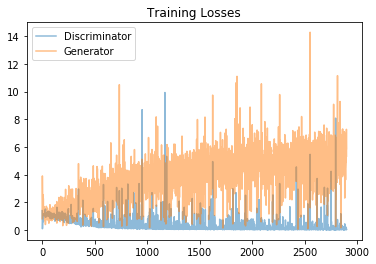

In [22]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()

## Generator samples from training

View samples of images from the generator, and answer a question about the strengths and weaknesses of your trained models.

In [23]:
# helper function for viewing a list of passed in sample images
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(16,4), nrows=2, ncols=8, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach().cpu().numpy()
        img = np.transpose(img, (1, 2, 0))
        img = ((img + 1)*255 / (2)).astype(np.uint8)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((32,32,3)))

In [24]:
# Load samples from generator, taken while training
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

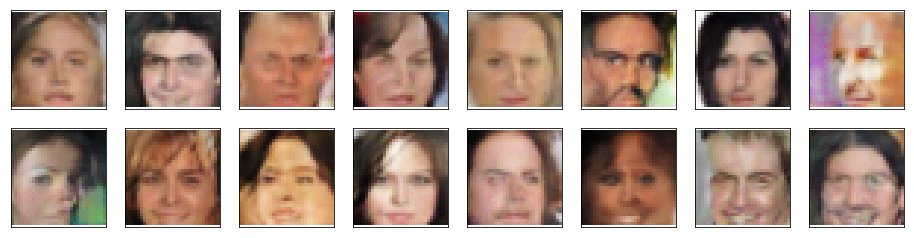

In [25]:
_ = view_samples(-1, samples)

### Question: What do you notice about your generated samples and how might you improve this model?
When you answer this question, consider the following factors:
* The dataset is biased; it is made of "celebrity" faces that are mostly white
* Model size; larger models have the opportunity to learn more features in a data feature space
* Optimization strategy; optimizers and number of epochs affect your final result


**Answer:** 

- Since the dataset is biased, the model is more likely to create white adult faces. You can also assume those kind of faces are more likely better quality (since there are more examples to learn the features). The model would perform better, if there were more images and those images would have more variation.
- The angle of view seems to affect a lot too. I believe there are more images taken straight from the front than from the side and that's why the model is not that good when creating faces from the side.
- The model was not that large so the quality of the images created is not that great either. Deeper model would probably work better, but of course would be good to improve the dataset also.
- Trying different optimizers might help finding the best model.
- Increasing the number of epochs did not really help with this task - the way the faces looked after ten epochs and 100 epochs did not differ that much. You can also see the generator loss just increases the more epochs you train.

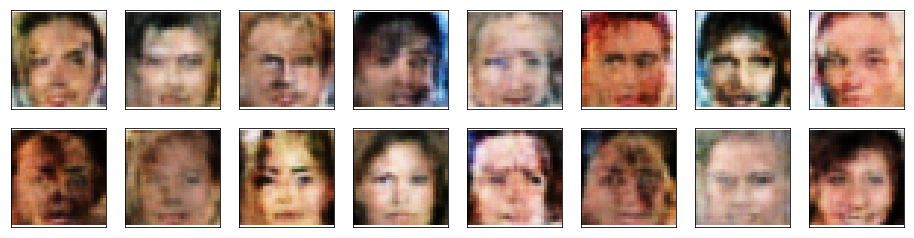

In [13]:
_ = view_samples(0, samples)

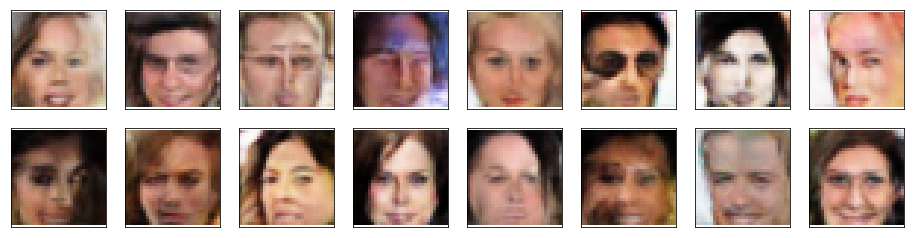

In [24]:
_ = view_samples(5, samples)

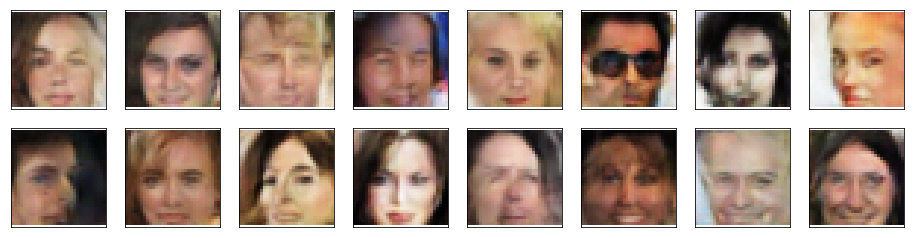

In [18]:
_ = view_samples(10, samples)

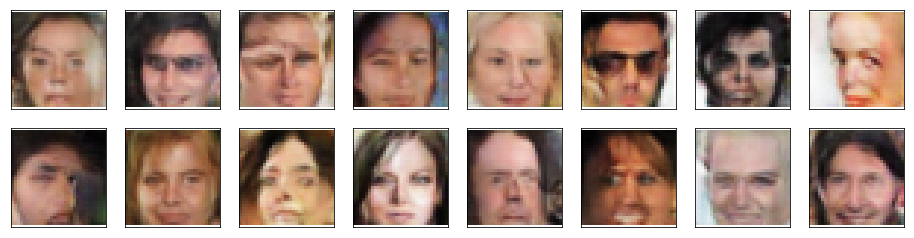

In [19]:
_ = view_samples(20, samples)

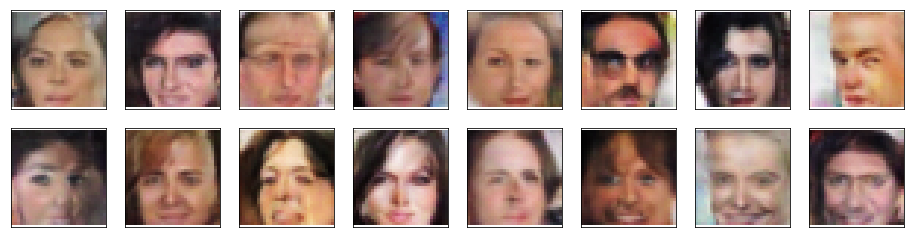

In [20]:
_ = view_samples(50, samples)

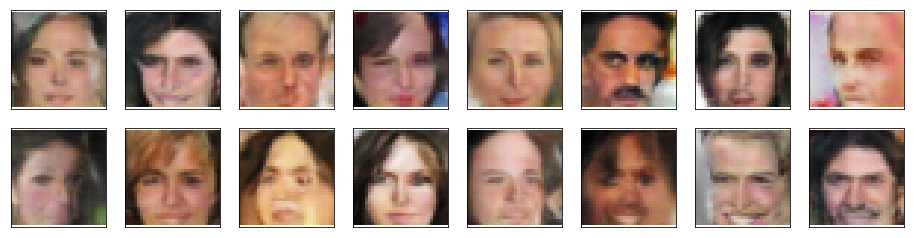

In [21]:
_ = view_samples(75, samples)

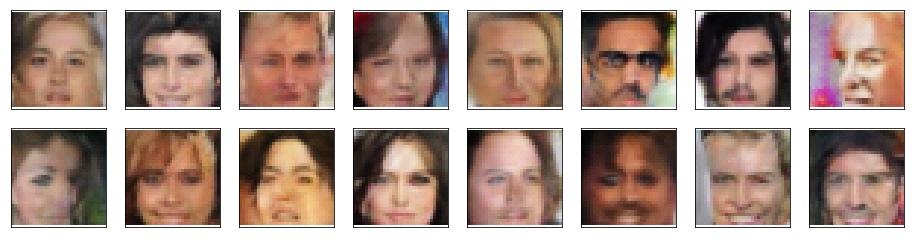

In [23]:
_ = view_samples(90, samples)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "problem_unittests.py" files in your submission.